In [39]:
%matplotlib inline

from skimage.io import imread, imsave, imshow
from skimage import img_as_float, img_as_ubyte
import numpy as np
import os

In [37]:
def align(img, g_coord):
    img = img_as_float(img)
    
    size = img.shape[0] // 3
    img_1 = img[0: size, :]
    img_2 = img[size: size * 2, :]
    img_3 = img[size * 2:, :]
    
    padding = 30
    y, x = img_1.shape
    img_1 = img_1[padding: y - 1 - padding, padding: x - 1 - padding]
    y, x = img_2.shape
    img_2 = img_2[padding: y - 1 - padding, padding: x - 1 - padding]
    y, x = img_3.shape
    img_3 = img_3[padding: y - 1 - padding, padding: x - 1 - padding]
    
    y, x = img_1.shape
    img_2 = img_2[: y, : x]
    img_3 = img_3[: y, : x]
    
    the_best_corr = 0
    for i in range(-15, 16, 1):
        for j in range(-15, 16, 1):
            new_img_1 = np.roll(img_1, i, 0)
            new_img_1 = np.roll(new_img_1, j, 1)

            correlation = (img_2 * new_img_1).sum()
            if correlation > the_best_corr:
                the_best_corr = correlation
                shift_1 = [i, j]
    
    the_best_corr = 0
    for i in range(-15, 16, 1):
        for j in range(-15, 16, 1):
            new_img_3 = np.roll(img_3, i, 0)
            new_img_3 = np.roll(new_img_3, j, 1)

            correlation = (img_2 * new_img_3).sum()
            if correlation > the_best_corr:
                the_best_corr = correlation
                shift_2 = [i, j]
    
    row_g, col_g = g_coord
    true_shift = row_g - size - padding
    row_b = true_shift + padding - shift_1[0]
    col_b = col_g - shift_1[1]
    row_r = size * 2 + true_shift + padding - shift_2[0]
    col_r = col_g - shift_2[1]
    
    return (row_b, col_b), (row_r, col_r)

In [38]:
align(img, (508, 237))

((153, 236), (857, 238))

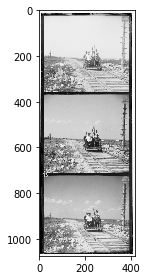

In [2]:
img = img_as_float(imread('images/00.png'))
imshow(img)

In [3]:
size = img.shape[0] // 3

In [5]:
img_1 = img[0: size, :]
img_2 = img[size: size * 2, :]
img_3 = img[size * 2:, :]

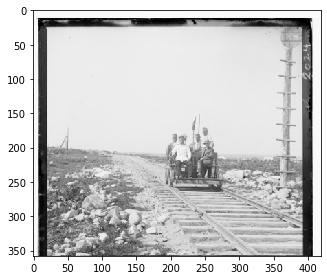

In [6]:
imshow(img_1)

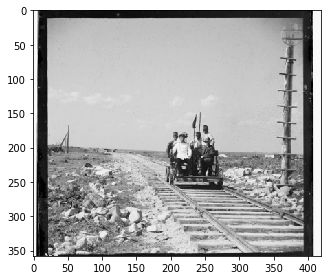

In [7]:
imshow(img_2)

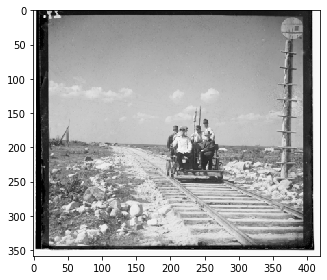

In [8]:
imshow(img_3)

In [9]:
padding = 30

In [10]:
y, x = img_1.shape
img_1 = img_1[padding: y - 1 - padding, padding: x - 1 - padding]
y, x = img_2.shape
img_2 = img_2[padding: y - 1 - padding, padding: x - 1 - padding]
y, x = img_3.shape
img_3 = img_3[padding: y - 1 - padding, padding: x - 1 - padding]

In [11]:
y, x = img_1.shape
img_2 = img_2[: y, : x]
img_3 = img_3[: y, : x]

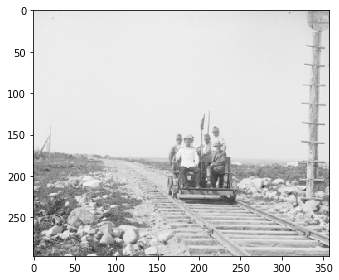

In [12]:
imshow(img_1)

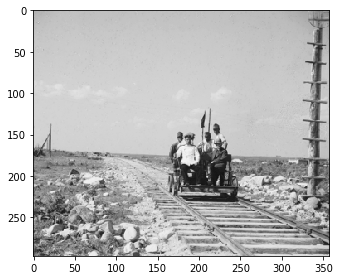

In [13]:
imshow(img_2)

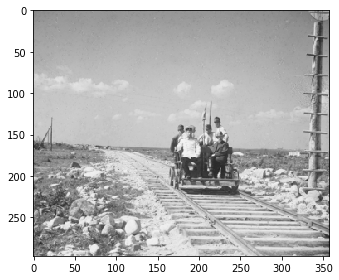

In [14]:
imshow(img_3)

In [15]:
img_1.shape, img_2.shape, img_3.shape

((297, 358), (297, 358), (297, 358))

In [16]:
new_3 = img_3[:287, :]

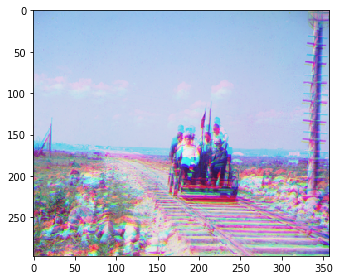

In [17]:
imshow(np.dstack((img_3, img_2, img_1)))

In [18]:
the_best_corr = 0
for i in range(-15, 16, 1):
    for j in range(-15, 16, 1):
        new_img_1 = np.roll(img_1, i, 0)
        new_img_1 = np.roll(new_img_1, j, 1)
        
        correlation = (img_2 * new_img_1).sum()
        if correlation > the_best_corr:
            the_best_corr = correlation
            shift_1 = [i, j]
        

In [19]:
shift_1

[-3, 1]

In [20]:
the_best_corr = 0
for i in range(-15, 16, 1):
    for j in range(-15, 16, 1):
        new_img_3 = np.roll(img_3, i, 0)
        new_img_3 = np.roll(new_img_3, j, 1)
        
        correlation = (img_2 * new_img_3).sum()
        if correlation > the_best_corr:
            the_best_corr = correlation
            shift_2 = [i, j]

In [21]:
shift_2

[9, -1]

In [22]:
shift_img_1 = np.roll(img_2, shift_1[0], 0)
shift_img_1 = np.roll(shift_img_1, shift_1[1], 1)
shift_img_3 = np.roll(img_3, shift_2[0], 0)
shift_img_3 = np.roll(shift_img_3, shift_2[1], 1)

In [23]:
color_img = np.dstack((shift_img_3, img_2, shift_img_1))

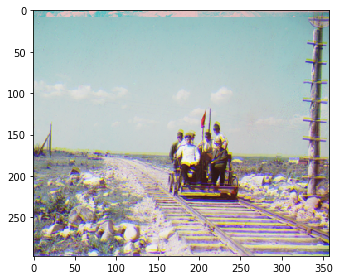

In [24]:
imshow(color_img)

In [25]:
color_img.shape

(297, 358, 3)

In [ ]:
508 237 -- 153 236 -- 858 238

In [30]:
508 - 30 - 30 - 297 - 30 -- 3

124

In [27]:
size

358

In [35]:
508 - 358 - 30 + 30 - -3

153

In [33]:
237 - 1

236

In [32]:
358 * 2 + 30 + 120 - 9

857

In [36]:
237 - -1

238

In [72]:
img = imread('images/exam_1/00.png')

In [78]:

def get_color_image(image):
    img = img_as_float(image)
    
    size = img.shape[0] // 3
    img_1 = img[0: size, :]
    img_2 = img[size: size * 2, :]
    img_3 = img[size * 2:, :]
    
    padding = 30
    y, x = img_1.shape
    img_1 = img_1[padding: y - 1 - padding, padding: x - 1 - padding]
    y, x = img_2.shape
    img_2 = img_2[padding: y - 1 - padding, padding: x - 1 - padding]
    y, x = img_3.shape
    img_3 = img_3[padding: y - 1 - padding, padding: x - 1 - padding]
    
    y, x = img_1.shape
    img_2 = img_2[: y, : x]
    img_3 = img_3[: y, : x]
    
    the_best_corr = 0
    for i in range(-15, 16, 1):
        for j in range(-15, 16, 1):
            new_img_1 = np.roll(img_1, i, 0)
            new_img_1 = np.roll(new_img_1, j, 1)

            correlation = (img_2 * new_img_1).sum()
            if correlation > the_best_corr:
                the_best_corr = correlation
                shift_1 = [i, j]
    
    the_best_corr = 0
    for i in range(-15, 16, 1):
        for j in range(-15, 16, 1):
            new_img_3 = np.roll(img_3, i, 0)
            new_img_3 = np.roll(new_img_3, j, 1)

            correlation = (img_2 * new_img_3).sum()
            if correlation > the_best_corr:
                the_best_corr = correlation
                shift_2 = [i, j]
    
    shift_img_1 = np.roll(img_2, shift_1[0], 0)
    shift_img_1 = np.roll(shift_img_1, shift_1[1], 1)
    shift_img_3 = np.roll(img_3, shift_2[0], 0)
    shift_img_3 = np.roll(shift_img_3, shift_2[1], 1)
    
    color_img = np.dstack((shift_img_3, img_2, shift_img_1))
    color_img = img_as_ubyte(color_img)
    
    return color_img

In [90]:
img = imread('images/exam_1/09.png')
imsave('10.png', get_color_image(img))